# Importing Data and Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('ICD_word_probabilities.csv', index_col=[0])

In [25]:
df.head()

,word,SYMPTOMS,DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS,SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS,MENTAL DISORDERS,INJURY AND POISONING,"ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS",DISEASES OF THE DIGESTIVE SYSTEM,DISEASES OF THE RESPIRATORY SYSTEM,EXTERNAL CAUSES FOR INJURY,...,DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE,DISEASES OF THE CIRCULATORY SYSTEM,INFECTIOUS AND PARASITIC DISEASES,"COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM",NONSPECIFIC ABNORMAL FINDINGS,MISADVENTURES TO PATIENTS DURING SURGICAL AND MEDICAL CARE,OTHERS,OTHER ILL-DEFINED AND UNKNOWN CAUSES OF MORBIDITY AND MORTALITY,CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD,"SUDDEN DEATH, CAUSE UNKNOWN"
0,nausea,1.820907e-92,0.262123,1.859948,24.939075,4.992269,1.012069,6.529853,1.149940,1.108656,...,2.332014,4.311146,2.472792e-09,3.725267,0.167361,1.764590e-07,0.000049,0.918935,32.189889,1.129186e-16
1,vomiting,3.177808e-93,0.136892,0.332451,13.984640,1.962758,0.183602,3.847785,2.467111,2.453870,...,1.254860,1.241318,4.840888e-10,20.686830,19.294563,1.030286e-08,0.000008,1.133498,16.258696,8.481011e-18
2,hx,7.947040e-93,0.149980,6.955346,13.164250,1.676974,2.060707,1.936477,20.322253,3.417717,...,0.728011,3.078218,1.194042e-09,20.142558,0.235433,7.741657e-08,0.002297,1.510692,9.101724,6.915323e-17
3,ca,8.823306e-93,0.227851,0.543118,3.935066,0.977335,1.910305,1.466141,2.499494,1.594690,...,2.195526,4.499913,1.636450e-09,68.562742,1.857896,1.336470e-07,0.000023,0.999268,4.398722,8.934869e-17
4,earache,1.324770e-92,0.211120,0.609459,1.089620,0.379043,0.589531,79.462711,8.930694,1.013643,...,1.968717,1.158115,1.429986e-09,0.813135,0.283441,1.573321e-07,0.000027,0.855715,1.192556,8.883270e-17


In [26]:
df2 = df.iloc[:,1:]

# Heat Map of Probabilities

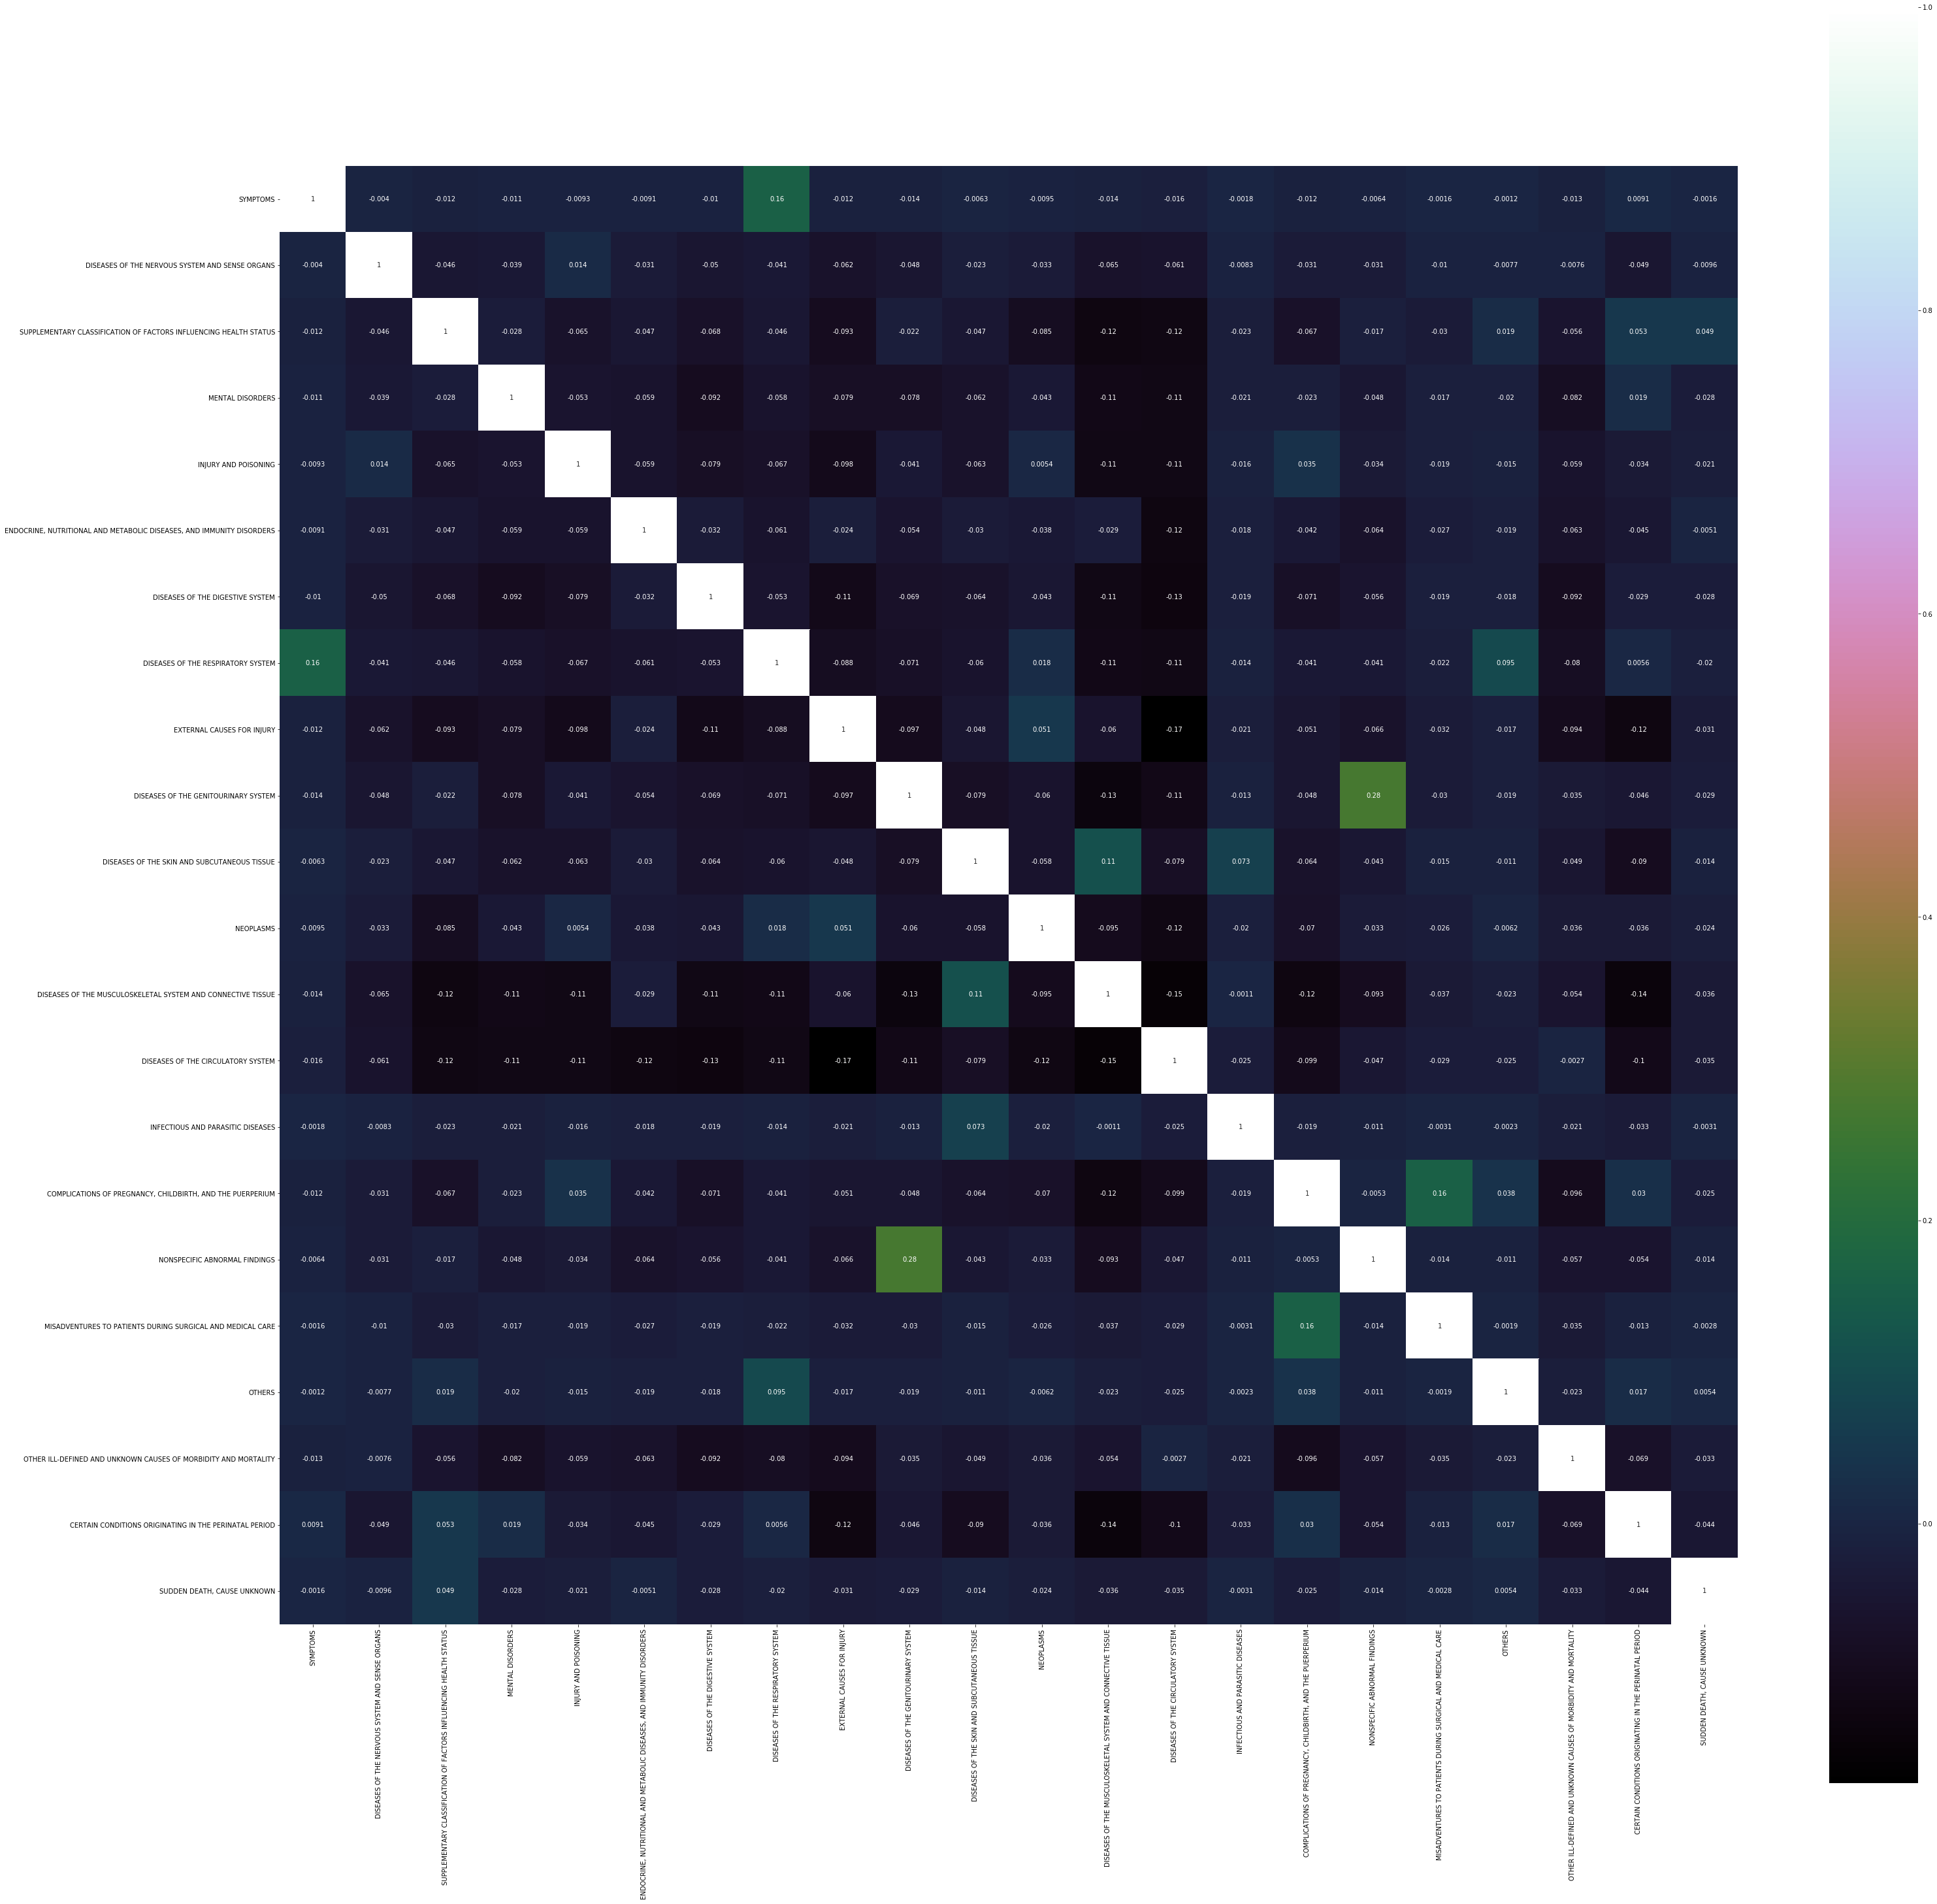

In [27]:
plt.rcParams.update({'font.size': 10})
correlation = df2.corr()
plt.figure(figsize=(50,50))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix') 

# PCA - not useful

In [28]:
X_std = StandardScaler().fit_transform(df2)

In [29]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [30]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] #List of Eigen Value and Eigen vector Tuples

eig_pairs.sort(key=lambda x: x[0], reverse=True) #Sorting Eigen Values

#printing eigen values in the descending order (priniting top 5 high values eigen values in the output)
cnt = 0
for i in eig_pairs:
    if cnt == 5:
        break
    print(i[0])
    cnt += 1

1.456788460749966
1.361134674794277
1.2717758465336675
1.2360643713716695
1.2043651057487859


Cumulative Variance for 31 principle components is 59.332466299688924 %


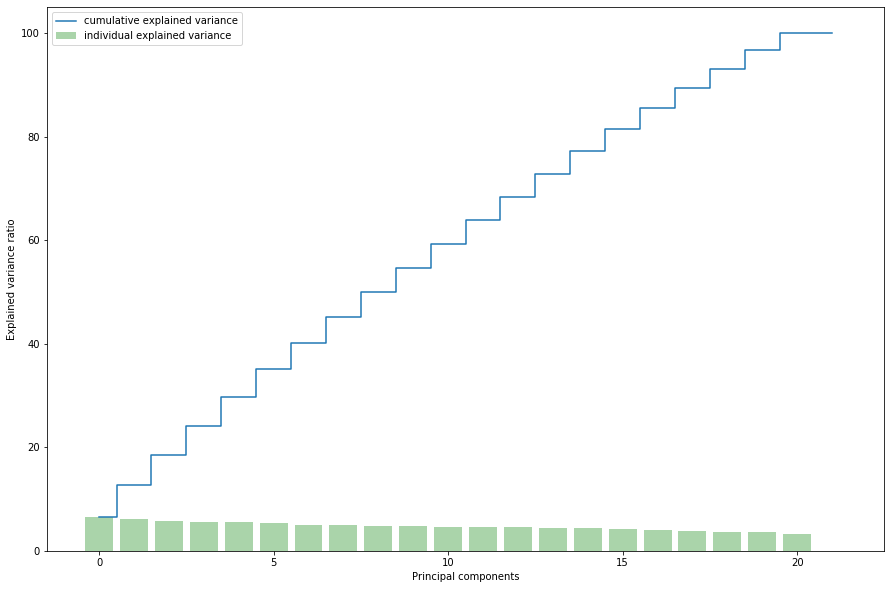

In [31]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(15, 10))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
print ("Cumulative Variance for 31 principle components is",cum_var_exp[10], "%")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [32]:
data_labels = list(df["word"].values)

In [33]:
samples = df2.values

# Hierarchial Cluster

In [35]:
mergings = linkage(samples, method='complete')

In [36]:
print (len(mergings))

1058


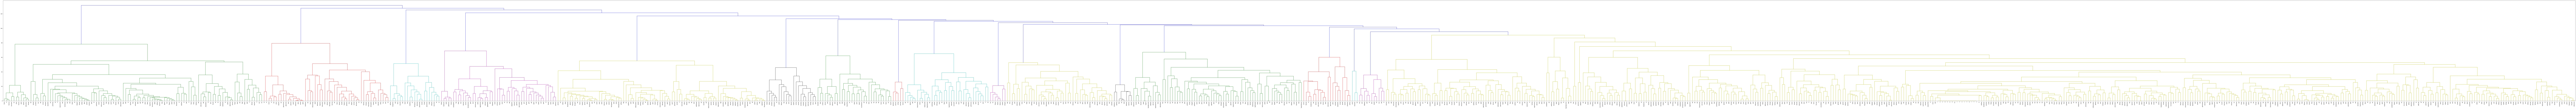

In [37]:
plt.figure(figsize=(500, 20))
dendrogram(mergings,
           labels=data_labels,
           leaf_rotation=90,
           leaf_font_size=10,
           
)
plt.savefig('cluster analysis' + '.png', bbox_inches='tight')
plt.show()

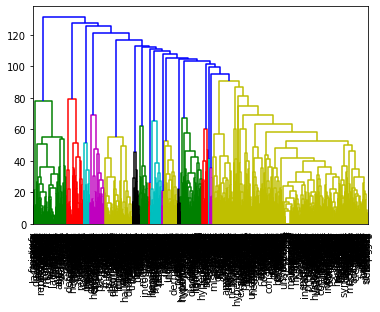

In [39]:
den = dendrogram(mergings,
           labels=data_labels,
           leaf_rotation=90,
           leaf_font_size=10,)

In [40]:
print (den)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [12.5, 12.5, 40.0, 40.0], [55.0, 55.0, 65.0, 65.0], [95.0, 95.0, 105.0, 105.0], [85.0, 85.0, 100.0, 100.0], [75.0, 75.0, 92.5, 92.5], [60.0, 60.0, 83.75, 83.75], [26.25, 26.25, 71.875, 71.875], [135.0, 135.0, 145.0, 145.0], [125.0, 125.0, 140.0, 140.0], [115.0, 115.0, 132.5, 132.5], [165.0, 165.0, 175.0, 175.0], [155.0, 155.0, 170.0, 170.0], [265.0, 265.0, 275.0, 275.0], [255.0, 255.0, 270.0, 270.0], [245.0, 245.0, 262.5, 262.5], [235.0, 235.0, 253.75, 253.75], [225.0, 225.0, 244.375, 244.375], [215.0, 215.0, 234.6875, 234.6875], [345.0, 345.0, 355.0, 355.0], [335.0, 335.0, 350.0, 350.0], [325.0, 325.0, 342.5, 342.5], [315.0, 315.0, 333.75, 333.75], [305.0, 305.0, 324.375, 324.375], [295.0, 295.0, 314.6875, 314.6875], [285.0, 285.0, 304.84375, 304.84375], [224.84375, 224.84375, 294.921875, 294.921875], [205.0, 205.0, 259.8828125, 259.8828125], [195.0, 195.0, 232.44140625, 232.44140625], [375.0, 375.